# Gazi AI Topluluğu 
## Veriyi hazırlama (Data processing)
### Gerekli kütüphanelerin içe aktarılması

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Önce veriyi içeri aktaralım

### Değişken Tanımı
#### PassengerId => Yolcu numarası (unique id number to each passenger=her yolcu için benzersiz kimlik numarası)
#### Survived => Yolcu hayatta mı ? (0 = Vefat eden, 1 = Hayatta kalmış) survive(1) or died(0)
#### Pclass => Yolcu sınıfları = passenger class
#### Name => Yolcunun adı = name
#### Sex => Yolcunun cinsiyeti = gender of passenger
#### Age => Yolcunun yaşı = age of passenger
#### SibSp => Yolcunun gemide bulunan kardeşleri yada eşleri = number of siblings/spouses
#### Parch => Yolcunun gemide bulunan anne, babası yada çocukları = number of parents/children
#### Ticket => Yolcunun bilet numarası = ticket number
#### Fare => Yolcunun bilet fiyatı = amount of money spent on ticket
#### Cabin => Yolcunun kabin numarası = cabin category
#### Embarked => Yolcunun gemiye bindiği liman = port where passenger embarked (C = Cherbourg, Q = Queenstown, S Southampton)

In [2]:
#Verinin Okunması ve içe aktarılması
veri = pd.read_csv("../input/titanicdataset-traincsv/train.csv")
veri

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Veri hakkındaki genel bilgileri alalım
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Veri hakkındaki istatiksel bilgileri alalım
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
#Gereksiz kolonları veriden atalım 
veri.drop(["PassengerId","Cabin","Ticket","Name"],axis=1,inplace = True)
veri

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
#Eksik verileri Görüntüleyelim
veri.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
#Eksik verilerin doldurulması
veri.Age.fillna(veri.Age.mean(),inplace=True)
veri.isna().sum()
veri.Age.mean()

29.69911764705882

In [8]:
#Eksik veri doldurulması (embarked)
veri.Embarked.fillna(veri.Embarked.mode()[0],inplace=True)
veri.Embarked.mode()

0    S
dtype: object

In [9]:
veri.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Verilerin görselleştirilmesi

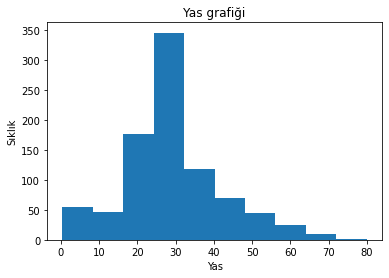

Text(0, 0.5, 'Sıklık')

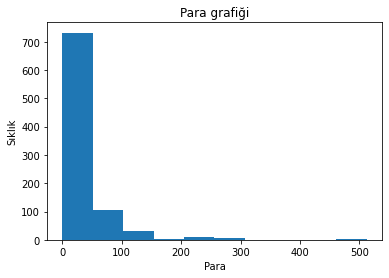

In [10]:
#Histogram grafiği, Sayısal değerler için
plt.hist(veri.Age)
plt.title("Yas grafiği")
plt.xlabel("Yas")
plt.ylabel("Sıklık")
plt.show()

plt.hist(veri.Fare)
plt.title("Para grafiği")
plt.xlabel("Para")
plt.ylabel("Sıklık")

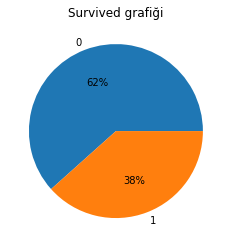

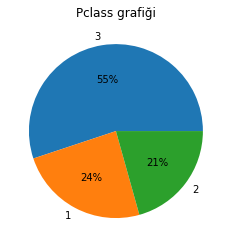

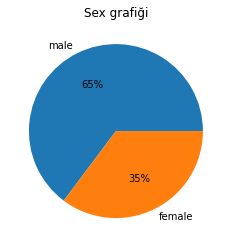

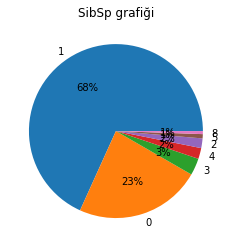

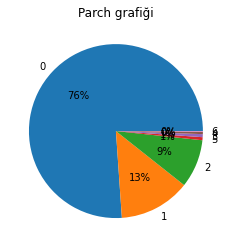

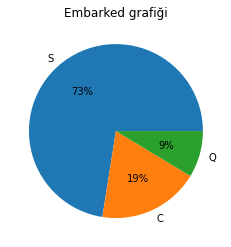

In [11]:
def pasta(kolon): #Pasta grafiğini özelleştirmek için bir fonksiyon oluşturduk
    plt.pie(veri[kolon].value_counts(),labels = veri[kolon].unique(), 
           autopct = "%1.f%%")
    plt.title(kolon + " grafiği")
    plt.show()

kategorik = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']

for column in kategorik: #Tüm kategorik değişkenleri yazdırmak için for döngüsünü kullandık 
    pasta(column)

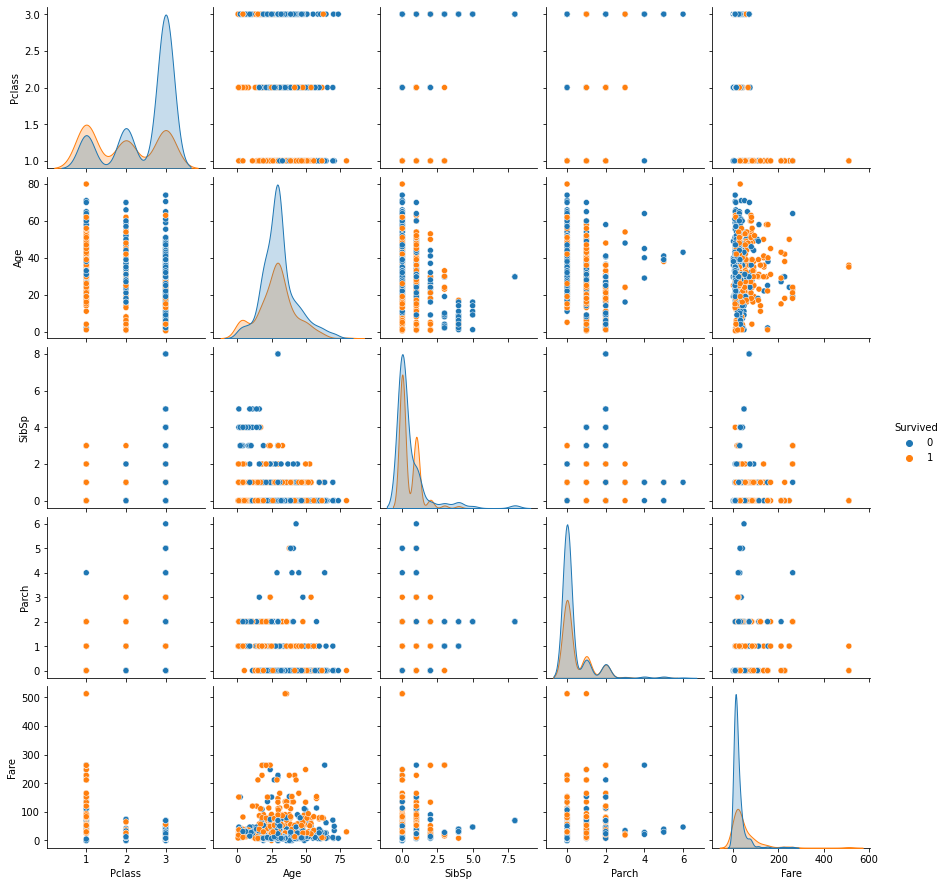

In [12]:
#PairPlot (Çiftler grafiği)
sns.pairplot(veri,hue = "Survived")


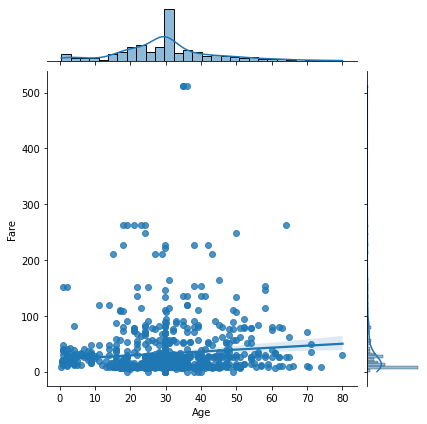

In [13]:
#Jointplot
sns.jointplot(veri.Age,veri.Fare,kind = "reg")


In [14]:
#veriler arasındaki ilişkinin açıklanması
veri[["Survived","Pclass"]].groupby("Pclass").mean()
veri[["Survived","Sex"]].groupby("Sex").mean()
veri[["Survived","SibSp"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
#Aykırı verilerin analizi
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    '''
    Q1 = first quartile
    Q3 = third quartile
    IQR = Interquartile range
    Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
    High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
    '''
    for c in features:
        # 1.Çeyrek (1st )
        Q1 = np.percentile(df[c],25)
        # 3.Çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR (Inter Quantile Range) Çeyrekler açıklığı
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers




In [16]:
#Aykırı değerlerin yazdırılması
detect_outliers(veri,["Age","Fare","SibSp","Parch","Survived"])
veri.loc[detect_outliers(veri,["Age","Fare","SibSp","Parch","Survived"])]
veri.drop(detect_outliers(veri,["Age","Fare","SibSp","Parch","Survived"]),inplace=True)
veri

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [17]:
#Kategorik verilerin sayısal veriye dönüştürülmesi
veri.Sex = (veri.Sex == "male").astype(int)
veri

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [18]:
#Embarked verisini OneHotEncoder ile kategorik hale getirmek
emb = veri["Embarked"]
emb = pd.get_dummies(emb,drop_first = True)
emb
#emb verisini ve ilk verimizi bilreştirip kategorik veriyi içerisinden çıkaralım
veri = pd.concat([veri,emb],axis=1)
veri
veri.drop(["Embarked"],axis=1,inplace=True)

# Gazi AI Topluluğu
## ML eğitimi
### Week 3 Day 1 

In [19]:
#Bağımlı ve bağımsız değişkeni birbirinden ayıralım 
Y = veri["Survived"]
Y
X = veri.drop(["Survived"],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.000000,1,0,7.2500,0,1
1,1,0,38.000000,1,0,71.2833,0,0
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,1
887,1,0,19.000000,0,0,30.0000,0,1
888,3,0,29.699118,1,2,23.4500,0,1
889,1,1,26.000000,0,0,30.0000,0,0


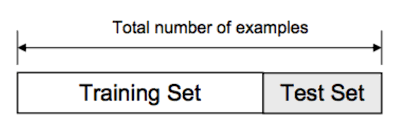


In [20]:
#Verinin train ve test olarak ayrılması
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size = 0.7,
                                            random_state = 42)

In [21]:
#Verilerin ölçeklendirilmesi
from sklearn.preprocessing import Normalizer
norm = Normalizer()
xtrain_ölçekli = pd.DataFrame(norm.fit_transform(xtrain))
xtrain_ölçekli
#Normalizasyon                                        

,0,1,2,3,4,5,6,7
0,0.006689,0.000000,0.198647,0.006689,0.000000,0.980025,0.000000,0.000000
1,0.016805,0.000000,0.285684,0.016805,0.000000,0.957882,0.000000,0.016805
2,0.086273,0.028758,0.977756,0.000000,0.000000,0.186803,0.000000,0.028758
3,0.010747,0.000000,0.204190,0.010747,0.000000,0.978813,0.000000,0.000000
4,0.130677,0.043559,0.914741,0.000000,0.000000,0.377330,0.000000,0.043559
...,...,...,...,...,...,...,...,...
601,0.014262,0.014262,0.670335,0.000000,0.000000,0.741647,0.000000,0.014262
602,0.045771,0.015257,0.991695,0.000000,0.000000,0.118241,0.015257,0.000000
603,0.061183,0.000000,0.795378,0.000000,0.101971,0.593984,0.020394,0.000000
604,0.083439,0.027813,0.826026,0.027813,0.000000,0.555337,0.000000,0.027813


# Lojistik Regresyon

In [22]:
from sklearn.linear_model import LogisticRegression #Sınıflandırma modülümüzü içeri aktardık
Lr = LogisticRegression() #Sınflandırma algoritmamızdan bir Nesne oluşturalım
Lr.fit(xtrain,ytrain) # Eğitimi gerçekleştirelim. .fit(eğitimin bağımsız değişkeni,eğitimin bağımlı değişkeni)
tahmin = Lr.predict(xtest) #Tahmin işlemini gerçekleştirelim 
tahminscore = Lr.score(xtest,ytest) # Tahminimizin doğruluk skorunu görelim
#Tahmin için geçerli ilk hata metriğimiz Accuracy (Doğruluk) Nesne.score(bağımsız test değişkeni,gerçek bağımlı veri)
#Ancak metrikleri farklı şekillerde de yazdırabiliriz

#Sensitivity-recall hesaplanması
from sklearn.metrics import recall_score as cr
report = cr(tahmin,ytest)
report

#Accuracyi tekrar yazdıralım
from sklearn.metrics import accuracy_score
accuracy_score(tahmin,ytest)



0.7769230769230769

# k-Nearest Neighbor ( k- En yakın Komşu ) 

In [23]:
from sklearn.neighbors import KNeighborsClassifier #Sınıflandırma modülünü içeri aktardık 
knn = KNeighborsClassifier(n_neighbors = 3) #knn sınıfından bir nesne oluşturduk ve komşu sayısını 3 olarak belirledik
knn.fit(xtrain,ytrain) #Eğitim işlemi
tahmin = knn.score(xtest,ytest) #Doğruluk skorunun hesaplanması
tahmin

0.7153846153846154

# Decision Tree ( Karar Ağacı )

In [24]:
from sklearn.tree import DecisionTreeClassifier #Sınıflandırma modülünü içeri aktardık 
dtc = DecisionTreeClassifier(criterion = "entropy") #Decison Tree sınıfından bir nesne oluşturduk ve komşu sayısını 3 olarak belirledik
dtc.fit(xtrain,ytrain) #Eğitim işlemi
tahmin = dtc.predict(xtest)#Tahmin değişkeninin yazdırılması
scoredtc = dtc.score(xtest,ytest) #Doğruluk skorunun yazdırılması
scoredtc

0.7461538461538462

# SVM Classifier (Destek Vektör Makineleri Sınıflandırıcısı)

In [25]:
from sklearn.svm import LinearSVC #Sınıflandırma modülünü içeri aktardık 
svc = LinearSVC() #Decison Tree sınıfından bir nesne oluşturduk ve komşu sayısını 3 olarak belirledik
svc.fit(xtrain,ytrain) #Eğitim işlemi
scoresvc = svc.score(xtest,ytest) #Doğruluk skorunun yazdırılması
scoresvc

0.46923076923076923

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier #Sınıflandırma modülünü içeri aktardık 
rfc = RandomForestClassifier(n_estimators = 20) #Decison Tree sınıfından bir nesne oluşturduk ve komşu sayısını 3 olarak belirledik
rfc.fit(xtrain,ytrain) #Eğitim işlemi
rfcscore = rfc.score(xtest,ytest) #Doğruluk skorunun yazdırılması
rfcscore

0.8115384615384615

In [27]:
#Sınıfalndırma işlemlerini tamamladık. Regresyonda görüşmek üzere :)